# Horizon Enterprise Aircraft Assessment Insights

## Overview

This projects analyzes the avaiation accidents since 1962, which contains informations about civil aviation accidents within the United States, its territories and in international waters. Insights from the analysis will enable Horizon Enterprise to identify safe, low-risk aircraft for Horizon Ventures, minimize operational risks, reduce negative publicity, and support the company's expansion into the aviation industry by ensuring safer, more reliable fleet acquisitions.

## Business Problem

Horizon Enterprises is seeking to expand into the Aviation and Aerospace Industry,specifically the Aircraft Operations and Fleet management as a means of diversifying their portfolio. The goal is to ensure business continuity, minimize financial risks, and optimize fleet performance.

## Data Understanding

The National Transportation Safety Board,an independent U.S. government agency responsible for investigating and determining the probable causes of transportation accidents, provides information from 1962 and later about civil aviation accidents within United States, its territories and in internation waters. 
The data files provide the event dates, location, aircraft category, make, model as well as other plane features.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
aviation_data = pd.read_csv('./data/AviationData.csv',encoding='cp1252', low_memory=False)
us_state_codes = pd.read_csv('./data/USState_Codes.csv')

In [4]:
us_state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [5]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
us_state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [8]:
aviation_data.shape

(88889, 31)

In [9]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The accident data contains various type of 
Investigation.Type, 
Country,
Injury.Severity,
Aircraft.damage,
Aircraft.Category, 
Make,
Number.of.Engines,
Engine.Type, 
Purpose.of.flight, 
Air.carrier,
Weather.Condition,
Broad.phase.of.flight. We therefore need to know the various data within them to understand the data more


In [10]:
aviation_data['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [11]:
aviation_data['Country'].value_counts()

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

In [12]:
aviation_data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [13]:
aviation_data['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

In [14]:
aviation_data['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [15]:
aviation_data['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [16]:
aviation_data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [17]:
aviation_data['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [18]:
aviation_data['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [19]:
aviation_data['Amateur.Built'].value_counts()

Amateur.Built
No     80312
Yes     8475
Name: count, dtype: int64

In [20]:
aviation_data['Air.carrier'].value_counts()

Air.carrier
Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: count, Length: 13590, dtype: int64

In [21]:
aviation_data['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

In [22]:
aviation_data['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [23]:
aviation_data['Report.Status'].value_counts()

Report.Status
Probable Cause                                                                                                                                                       61754
Foreign                                                                                                                                                               1999
<br /><br />                                                                                                                                                           167
Factual                                                                                                                                                                145
The pilot's failure to maintain directional control during the landing roll.                                                                                            56
                                                                                                                                   

In [24]:
unique_values = aviation_data['Report.Status'].unique()
sum_unique_values = len(aviation_data['Report.Status'].unique())
print(sum_unique_values)
print(unique_values)

17075
['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot’s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot’s loss of control due to a wind gust during landing.']


## Data Preparation

### Data Cleaning

In [25]:
#Format the column names removing unconventional naming ways, removing cases and making them easy to use
#intakes.columns = intakes.columns.str.lower().str.replace(' ', '_')
aviation_data.columns = aviation_data.columns.str.lower().str.replace('.','_')
aviation_data.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [26]:
# Count number of missing values in all the columns
aviation_data.isnull().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          13771
dtype: i

In [27]:
#Country is most crucial so check if null values exists in the country column, 
#otherwise we can try to infer the country from latitude and longitude if the missing values are many.
aviation_data = aviation_data.dropna(subset=['country'])
aviation_data['country'].isnull().sum()

0

In [28]:
# Drop columns that may not be of use for this projects main objective
aviation_data.drop(['accident_number','latitude','longitude','airport_code','airport_name','registration_number',
                   'far_description','schedule','air_carrier','report_status','publication_date'],
                   axis='columns', inplace=True)

In [29]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88663 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88663 non-null  object 
 1   investigation_type      88663 non-null  object 
 2   event_date              88663 non-null  object 
 3   location                88612 non-null  object 
 4   country                 88663 non-null  object 
 5   injury_severity         87663 non-null  object 
 6   aircraft_damage         85485 non-null  object 
 7   aircraft_category       32275 non-null  object 
 8   make                    88601 non-null  object 
 9   model                   88572 non-null  object 
 10  amateur_built           88561 non-null  object 
 11  number_of_engines       82587 non-null  float64
 12  engine_type             81573 non-null  object 
 13  purpose_of_flight       82478 non-null  object 
 14  total_fatal_injuries    77273 non-null  flo

In [30]:
#Convert the event date to datetime format
aviation_data['event_date'] = pd.to_datetime(aviation_data['event_date'])

In [31]:
# Replace all missing locations with unkown
aviation_data['location'].fillna('Unknown', inplace=True)
aviation_data['location'].isna().sum()

0

In [32]:
# Replace all missing locations with unkown
aviation_data['injury_severity'].fillna('Unknown', inplace=True)

In [33]:
# Replace all missing locations with unkown
aviation_data['aircraft_category'].fillna('Unknown', inplace=True)

In [34]:
#Drop these since they were only 63 and 92 missing values
aviation_data.dropna(subset=['make'], inplace=True)
aviation_data.dropna(subset=['model'], inplace=True)

In [35]:
# Use median to fill average number of engines for the airplane
aviation_data['number_of_engines'].fillna(aviation_data['number_of_engines'].median(), inplace=True)

In [36]:
# Replace all missing locations with unkown
aviation_data['purpose_of_flight'].fillna('Unknown', inplace=True)

In [37]:
# Replace all missing locations with unkown
aviation_data['aircraft_damage'].fillna('Unknown', inplace=True)

In [38]:
# Replace all missing locations with unkown
aviation_data['engine_type'].fillna('Unknown', inplace=True)

In [39]:
# Replace all missing locations with unkown
aviation_data['weather_condition'].fillna('Unknown', inplace=True)
aviation_data['broad_phase_of_flight'].fillna('Unknown', inplace=True)

<Axes: >

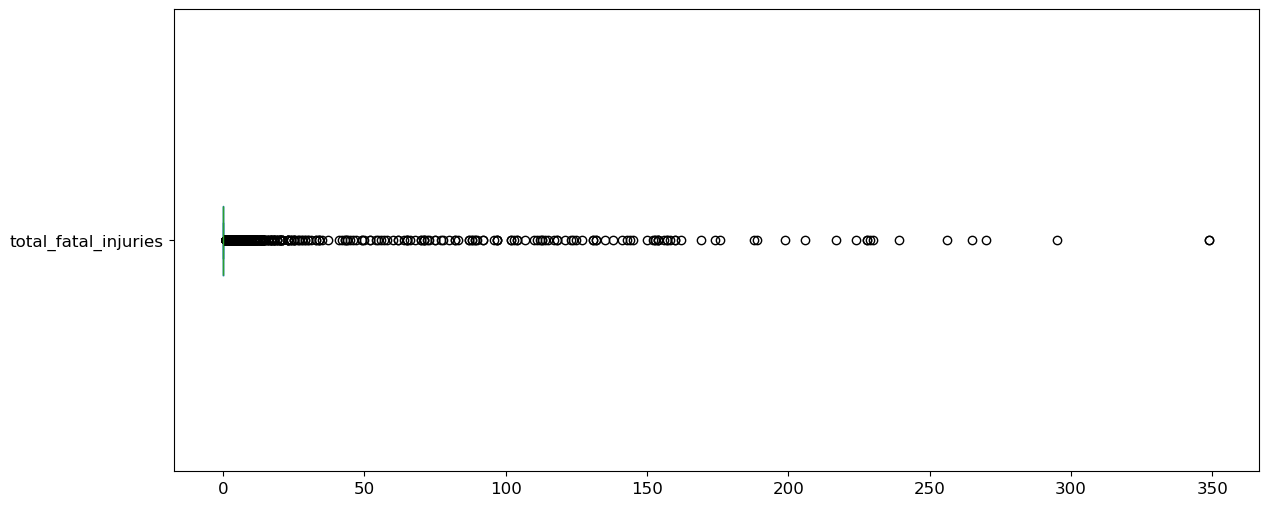

In [40]:
# For the numerical data, we plot box plots to view if 
# there are outliers, and determin if to use mena, mode or median to fill the null values

# Box plot for total_fatal_injuries to sess if there are outliers
aviation_data['total_fatal_injuries'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

<Axes: >

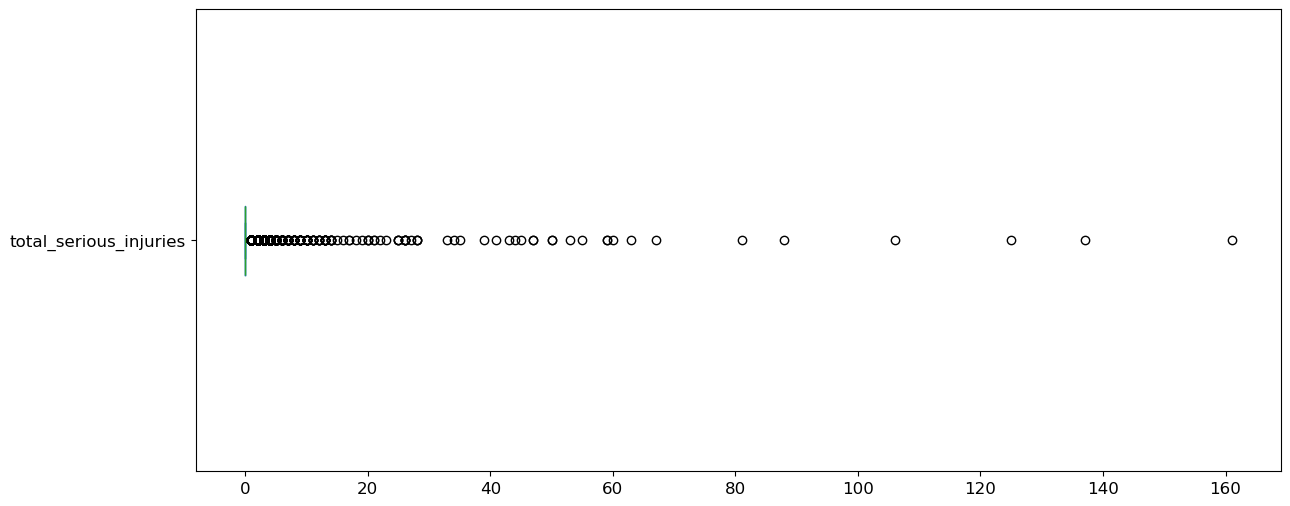

In [41]:
# Box plot for total_serious_injuries
aviation_data['total_serious_injuries'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

<Axes: >

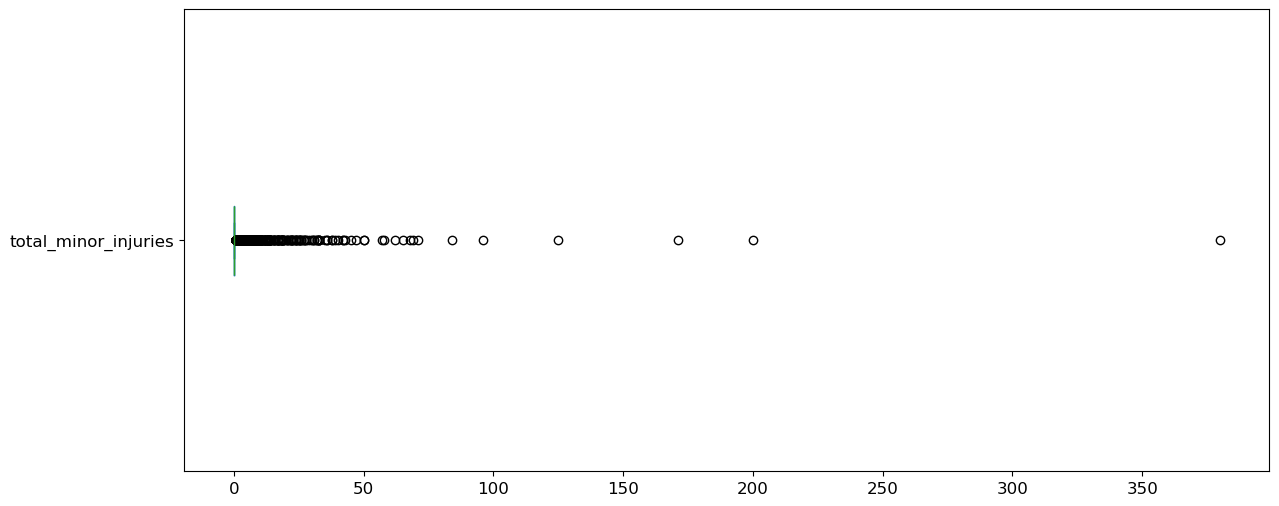

In [42]:
# Box plot for total_minor_injuries
aviation_data['total_minor_injuries'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

<Axes: >

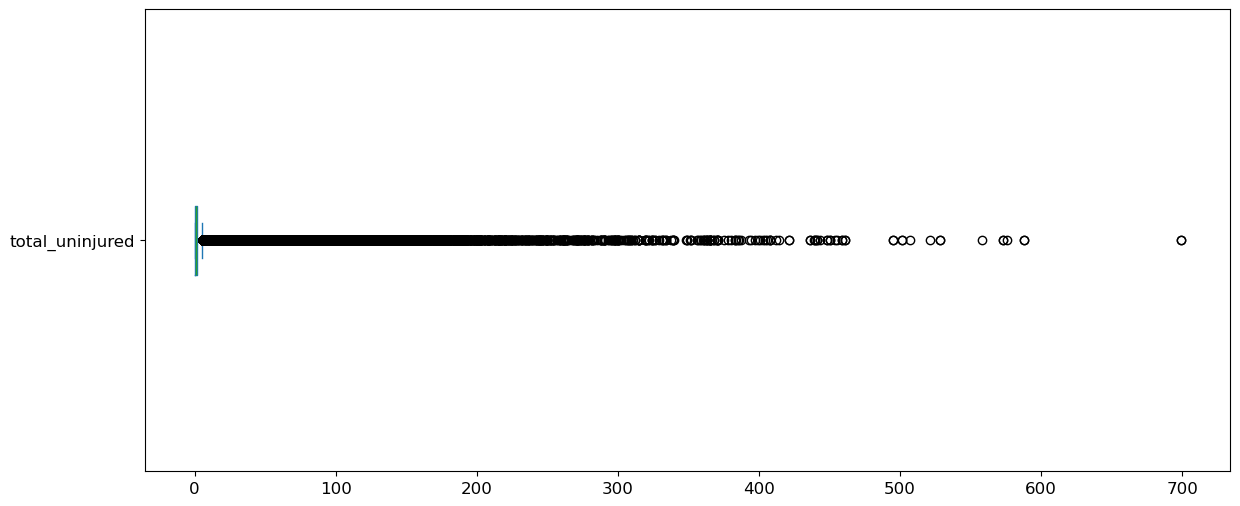

In [43]:
# Box plot for total_uninjured
aviation_data['total_uninjured'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

In [44]:
# Based on the boxplots bove, We use the median to fill the missing values.
aviation_data['total_fatal_injuries'].fillna(aviation_data['total_fatal_injuries'].median(), inplace=True)
aviation_data['total_serious_injuries'].fillna(aviation_data['total_serious_injuries'].median(), inplace=True)
aviation_data['total_minor_injuries'].fillna(aviation_data['total_minor_injuries'].median(), inplace=True)
aviation_data['total_uninjured'].fillna(aviation_data['total_uninjured'].median(), inplace=True)

In [45]:
#Use data set where no amatuer buit was used, since the missing values belonged to the 'No' data, 
#and being an enterprise professional build should only be allowed
aviation_data = aviation_data[aviation_data['amateur_built'] == 'Yes']

In [46]:
# Confirming if the dataframe has no missing values
aviation_data.isnull().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [47]:
aviation_data.describe()

,event_date,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,8432,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000
mean,2001-11-11 06:33:07.855787392,1.002372,0.371798,0.227941,0.283325,0.913069
min,1982-01-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992-06-28 18:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2001-10-27 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2011-05-17 06:00:00,1.000000,1.000000,0.000000,0.000000,1.000000
max,2022-11-30 00:00:00,4.000000,35.000000,9.000000,380.000000,365.000000
std,NaN,0.138597,0.797741,0.511741,4.231697,7.591995


### Merging Datasets

In [48]:
'''
We have the us_state_codes datasets, whose abbreviation column is found in the Location column of the aviation_data.
Therefore we create a new column us_state for the appropriate abbrevaition.
''' 
aviation_data['state_code'] = aviation_data['location'].str.split(", ").str[1]
aviation_data[['location', 'state_code','country']]

,location,state_code,country
45,"ROLLA, MO",MO,United States
73,"UPLAND, CA",CA,United States
99,"MOJAVE, CA",CA,United States
124,"KINGMAN, AZ",AZ,United States
143,"NEW ALBANY, MS",MS,United States
...,...,...,...
88744,"STATESBORO, GA",GA,United States
88754,"JASPER, GA",GA,United States
88812,"Banning, CA",CA,United States
88831,"Mountain Green, UT",UT,United States


In [49]:
# Confirm that we get the us state code for united states only.
aviation_data[aviation_data['state_code'].isna()][['location', 'state_code', 'country']]

,location,state_code,country
3081,GULF OF MEXICO,NaN,GULF OF MEXICO
3082,GULF OF MEXICO,NaN,GULF OF MEXICO
22136,ATLANTIC OCEAN,NaN,ATLANTIC OCEAN
27924,GULF OF MEXICO,NaN,GULF OF MEXICO
29762,ATLANTIC OCEAN,NaN,ATLANTIC OCEAN
37560,ATLANTIC OCEAN,NaN,ATLANTIC OCEAN
43735,ATLANTIC OCEAN,NaN,ATLANTIC OCEAN
44244,Unknown,NaN,Netherlands
44401,ATLANTIC OCEAN,NaN,ATLANTIC OCEAN


In [50]:
# Set all other no US counrties to 'other'
aviation_data['state_code'].fillna('other', inplace=True)
aviation_data[aviation_data['country'] != 'United States']

,event_id,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,...,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,state_code
3081,20020917X04638,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,...,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise,other
3082,20020917X04638,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,...,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise,other
20065,20001213X25508,Accident,1988-04-14,"MULEGE, Mexico",Mexico,Fatal(1),Destroyed,Unknown,Piper,PA28,...,0.0,Unknown,Personal,1.0,1.0,0.0,0.0,UNK,Unknown,Mexico
22054,20001213X27429,Accident,1988-12-16,"CUATRO CIENEGAS, Mexico",Mexico,Fatal(2),Destroyed,Unknown,Learjet,24B,...,0.0,Unknown,Personal,2.0,0.0,0.0,0.0,UNK,Unknown,Mexico
22136,20001213X27488,Incident,1988-12-30,ATLANTIC OCEAN,ATLANTIC OCEAN,Incident,Unknown,Unknown,Vickers,VC10,...,4.0,Turbo Fan,Public Aircraft,0.0,0.0,0.0,17.0,VMC,Cruise,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87036,20211023104151,Accident,2021-10-09,"Cape Town, South Africa",South Africa,Non-Fatal,Substantial,Helicopter,Rotoway International,Executive 162F,...,1.0,Unknown,Unknown,0.0,0.0,0.0,2.0,Unknown,Unknown,South Africa
87153,20211116104247,Accident,2021-11-10,"Felton, OF",United Kingdom,Non-Fatal,Substantial,Airplane,RANS,S6-ESD,...,1.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown,OF
87166,20211116104248,Accident,2021-11-14,"York, OF",United Kingdom,Fatal,Destroyed,Airplane,Just Aircraft LLC,Escapade,...,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,Unknown,OF
87697,20220421104978,Accident,2022-04-17,"Jyväskylä,",Finland,Non-Fatal,Destroyed,Airplane,MONNETT,SONERAI,...,1.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown,


In [51]:
# Merge the datasets on the corresponding columns using a left join
us_aviation_data = pd.merge(aviation_data, us_state_codes, how='left', 
                            left_on='state_code', right_on='Abbreviation')

In [52]:
aviation_data.describe()

,event_date,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,8432,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000
mean,2001-11-11 06:33:07.855787392,1.002372,0.371798,0.227941,0.283325,0.913069
min,1982-01-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992-06-28 18:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2001-10-27 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2011-05-17 06:00:00,1.000000,1.000000,0.000000,0.000000,1.000000
max,2022-11-30 00:00:00,4.000000,35.000000,9.000000,380.000000,365.000000
std,NaN,0.138597,0.797741,0.511741,4.231697,7.591995


## Analysis

##### Aircraft category and Flight purpose relationship
In order to determin which aircraft is most suited for purchase by Horizon, we need to discover the 
correlation between the various aircraft caregories and the purpose of the flight.
Most frequent purpose is for personal and airplanes are used the most.

/home/mugambi/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


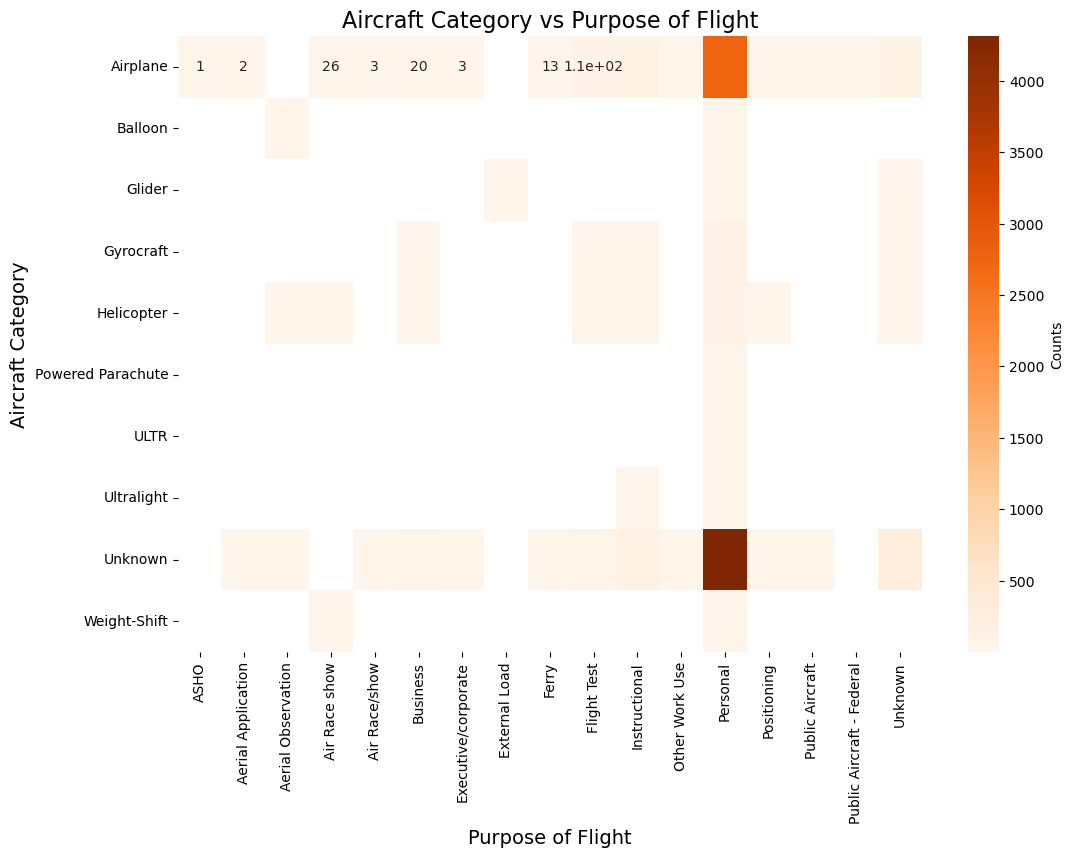

In [53]:
# Discover which Aircraft category is mostly used against the various flight purpose
heatmap_data = aviation_data.groupby(['aircraft_category', 'purpose_of_flight']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True,  cmap='Oranges', cbar_kws={'label': 'Counts'})

plt.title('Aircraft Category vs Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=14)
plt.ylabel('Aircraft Category', fontsize=14)
plt.show()


In [54]:
filtered_data = aviation_data
filtered_data.loc[:, 'year'] = aviation_data['event_date'].dt.year
accidents_per_year = filtered_data.groupby('year')[
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']
].sum().reset_index()

/home/mugambi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mugambi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mugambi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mugambi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

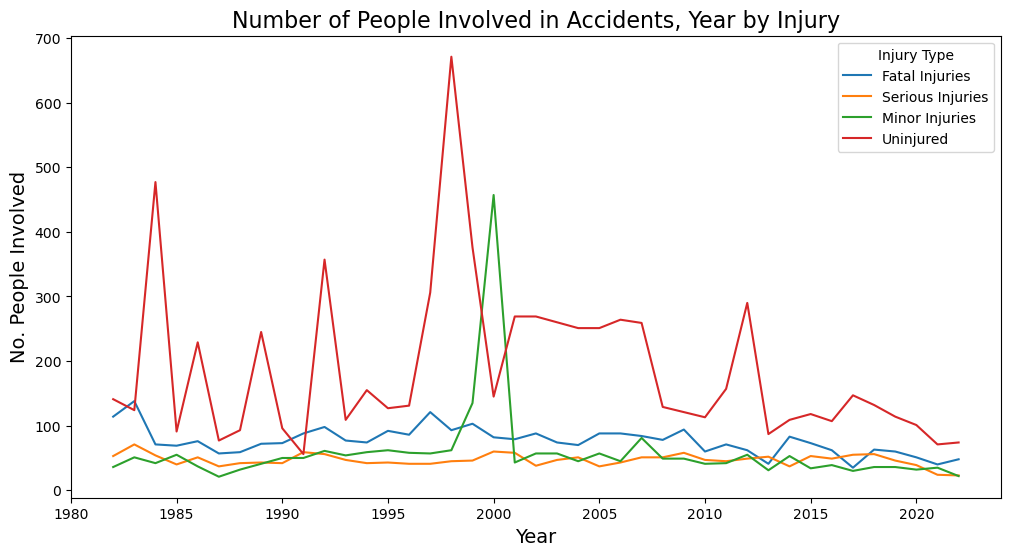

In [55]:
# Line plot for each injury category over the years since 1982
plt.figure(figsize=(12, 6))

sns.lineplot(x='year', y='total_fatal_injuries', data=accidents_per_year, label='Fatal Injuries')
sns.lineplot(x='year', y='total_serious_injuries', data=accidents_per_year, label='Serious Injuries')
sns.lineplot(x='year', y='total_minor_injuries', data=accidents_per_year, label='Minor Injuries')
sns.lineplot(x='year', y='total_uninjured', data=accidents_per_year, label='Uninjured')

plt.title('Number of People Involved in Accidents, Year by Injury', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. People Involved', fontsize=14)

plt.legend(title='Injury Type')
plt.show()


In [56]:
aviation_data.columns

Index(['event_id', 'investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'aircraft_category', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'state_code', 'year'],
      dtype='object')

### Injuries based on the aircraft category
Some aircraft cateories could have more injuries than others

In [57]:
#REmove unkown category type from the data
filtered_data = aviation_data[aviation_data['aircraft_category'] != 'Unknown']

In [58]:
air_cat_data = filtered_data.groupby(['aircraft_category'])[
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']
].sum().reset_index()
#air_cat_data

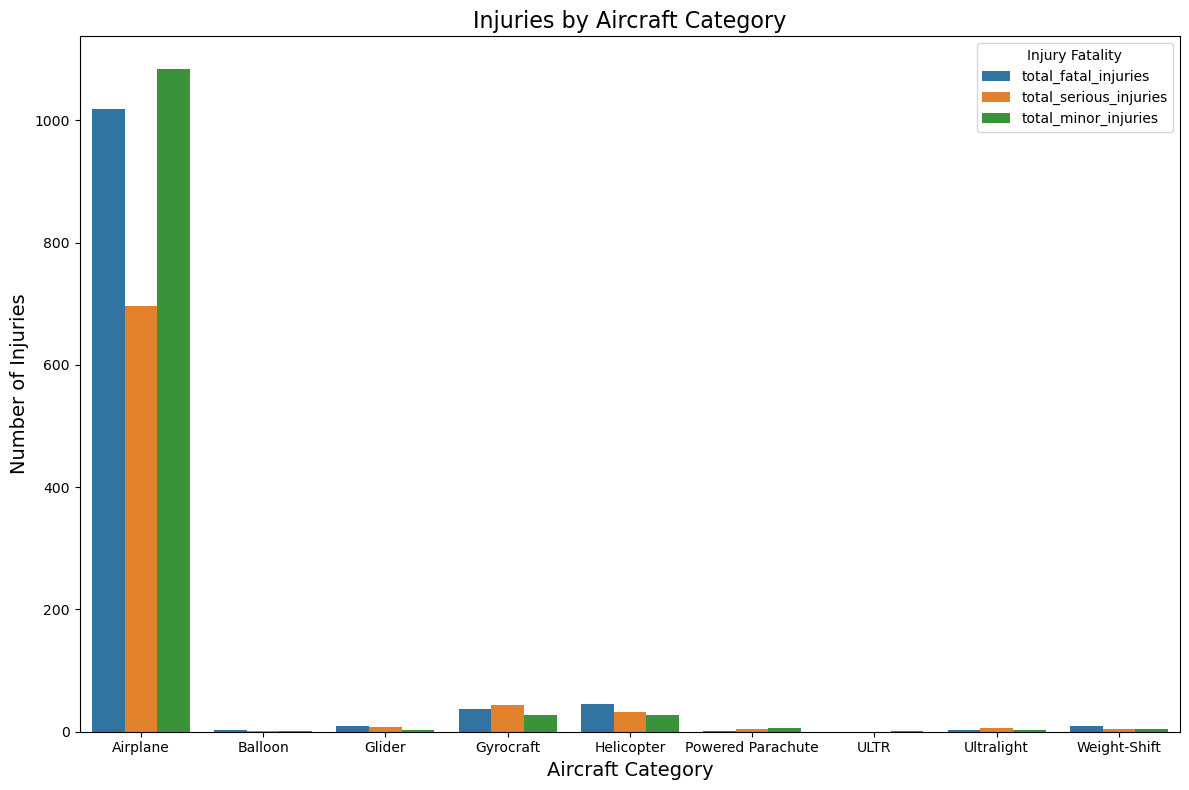

In [59]:
# Melt the data to have
air_cat_data = air_cat_data.melt(
    id_vars=['aircraft_category'], 
    value_vars=['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries'],
    var_name='injuries', 
    value_name='count'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=air_cat_data, x='aircraft_category', y='count', hue='injuries')

plt.title('Injuries by Aircraft Category', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.legend(title='Injury Fatality')
plt.tight_layout()
plt.show()


### Total fatal and serious Injuries based on the airplane make
Some airplane makes could have more result in more fatal injuries than others

In [60]:
#Focus on Airplane and helicopter and 
airplane_data = filtered_data[filtered_data['aircraft_category'] == 'Airplane']

make_data = airplane_data.groupby(['make'])[
    ['total_fatal_injuries','total_serious_injuries']
].sum().reset_index()

make_data.sort_values(by='total_fatal_injuries', ascending=False, inplace=True)
make_data.reset_index(drop=True, inplace=True)

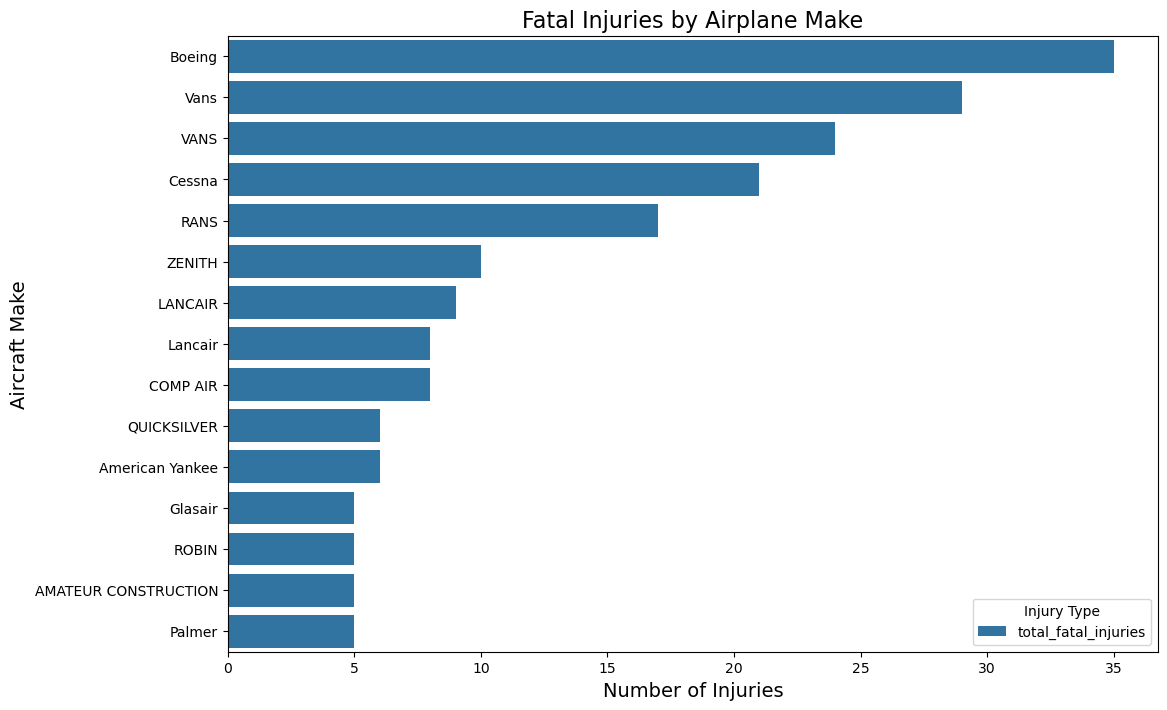

In [61]:
plot_data = make_data.melt(
    id_vars=['make'], 
    value_vars=['total_fatal_injuries'],
    var_name='injuries', 
    value_name='count'
).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, y='make', x='count', hue='injuries')
plt.title('Fatal Injuries by Airplane Make', fontsize=16)
plt.ylabel('Aircraft Make', fontsize=14)
plt.xlabel('Number of Injuries', fontsize=14)

plt.legend(title='Injury Type')

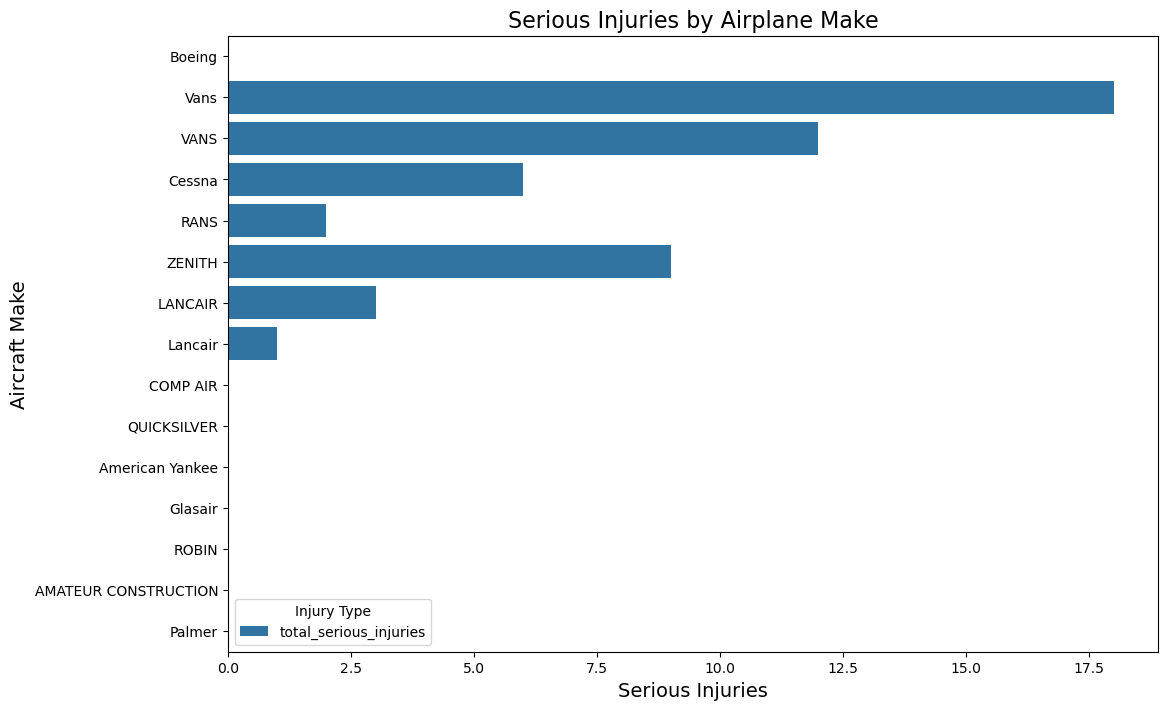

In [62]:
plot_data = make_data.melt(
    id_vars=['make'], 
    value_vars=['total_serious_injuries'],
    var_name='injuries', 
    value_name='count'
).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, y='make', x='count', hue='injuries')
plt.title('Serious Injuries by Airplane Make', fontsize=16)
plt.ylabel('Aircraft Make', fontsize=14)
plt.xlabel('Serious Injuries', fontsize=14)

plt.legend(title='Injury Type')

### Total uninjured based on airplane model and make
Some airplanes have reported less injuries

In [63]:
make_model_uninjured_data = filtered_data.groupby(['make', 'model'])['total_uninjured'].sum().reset_index()
make_model_uninjured_data.sort_values(by='total_uninjured', ascending=False, inplace=True)

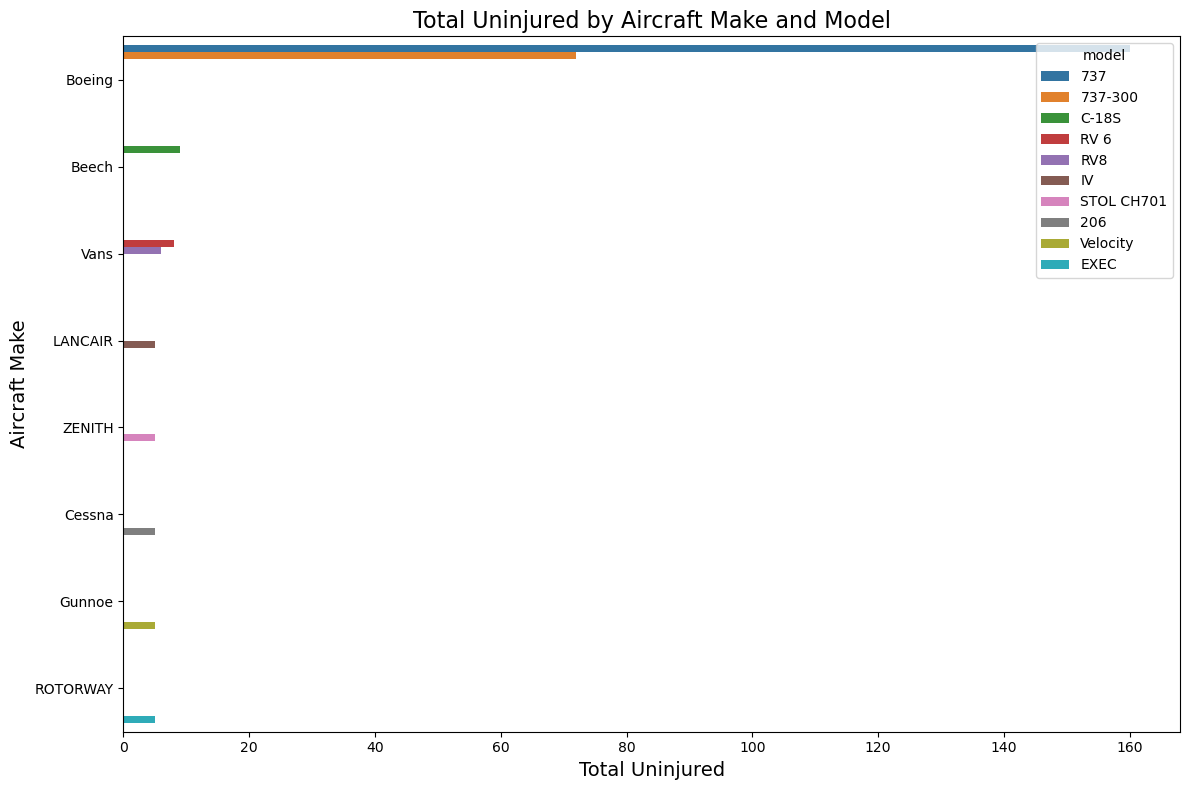

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_uninjured', y='make', data=make_model_uninjured_data.head(10), hue='model', dodge=True)

plt.title('Total Uninjured by Aircraft Make and Model', fontsize=16)
plt.xlabel('Total Uninjured', fontsize=14)
plt.ylabel('Aircraft Make', fontsize=14)
plt.tight_layout()

plt.show()

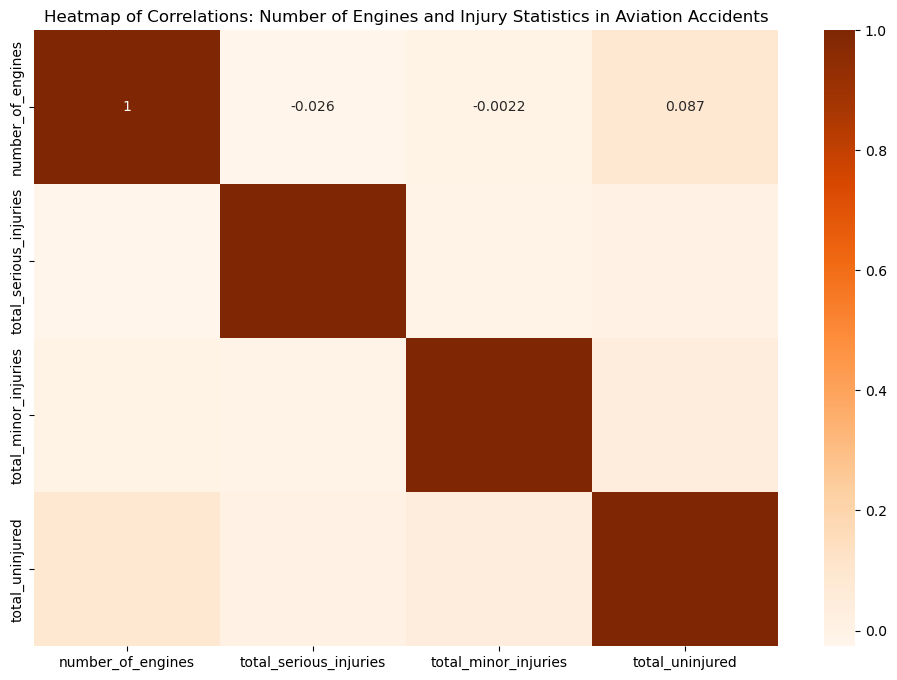

'\nBased on the heatmap, it seems that total_serious_injuries, total_minor_injuries, total_uninjured\ndo not have strong correlations with the number_of_engines\n'

In [65]:
# Heatmap to see if there is any correlation between the number_of_engines',
# 'total_serious_injuries','total_minor_injuries','total_uninjured'

numerical_data = aviation_data[['number_of_engines','total_serious_injuries',
                                'total_minor_injuries','total_uninjured']]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges')
plt.title('Heatmap of Correlations: Number of Engines and Injury Statistics in Aviation Accidents')
plt.show()

'''
Based on the heatmap, it seems that total_serious_injuries, total_minor_injuries, total_uninjured
do not have strong correlations with the number_of_engines
'''

##### Aircraft makes and purpose of flight compared against total_injuries.

In [66]:
filtered_data = filtered_data.copy()
filtered_data['total_injuries'] = (
    filtered_data['total_fatal_injuries'] +
    filtered_data['total_serious_injuries'] +
    filtered_data['total_minor_injuries']
)
filtered_data = filtered_data[filtered_data['purpose_of_flight'] != 'Unknown']

make_purpose_injuries_df = (
    filtered_data.groupby(['make', 'purpose_of_flight'])['total_injuries']
    .sum()
    .reset_index()
)#print(make_purpose_injuries_df.count())

In [67]:
# get the number of times a make appears in the dataframe for injuries
make_purpose_injuries_df['count'] = make_purpose_injuries_df.groupby('make')['make'].transform('count')

#print(make_purpose_injuries_df)
# Pers
personal_data = make_purpose_injuries_df[make_purpose_injuries_df['purpose_of_flight'] == 'Personal']
personal_data_sorted = personal_data.sort_values(by=['total_injuries', 'count']).head(10)

# Busin
business_data = make_purpose_injuries_df[make_purpose_injuries_df['purpose_of_flight'] == 'Business']
business_data_sorted = business_data.sort_values(by=['total_injuries', 'count']).head(10)

# Exec/Corp
executive_data = make_purpose_injuries_df[make_purpose_injuries_df['purpose_of_flight'] == 'Executive/corporate']
executive_data_sorted = executive_data.sort_values(by=['total_injuries', 'count']).head(10)

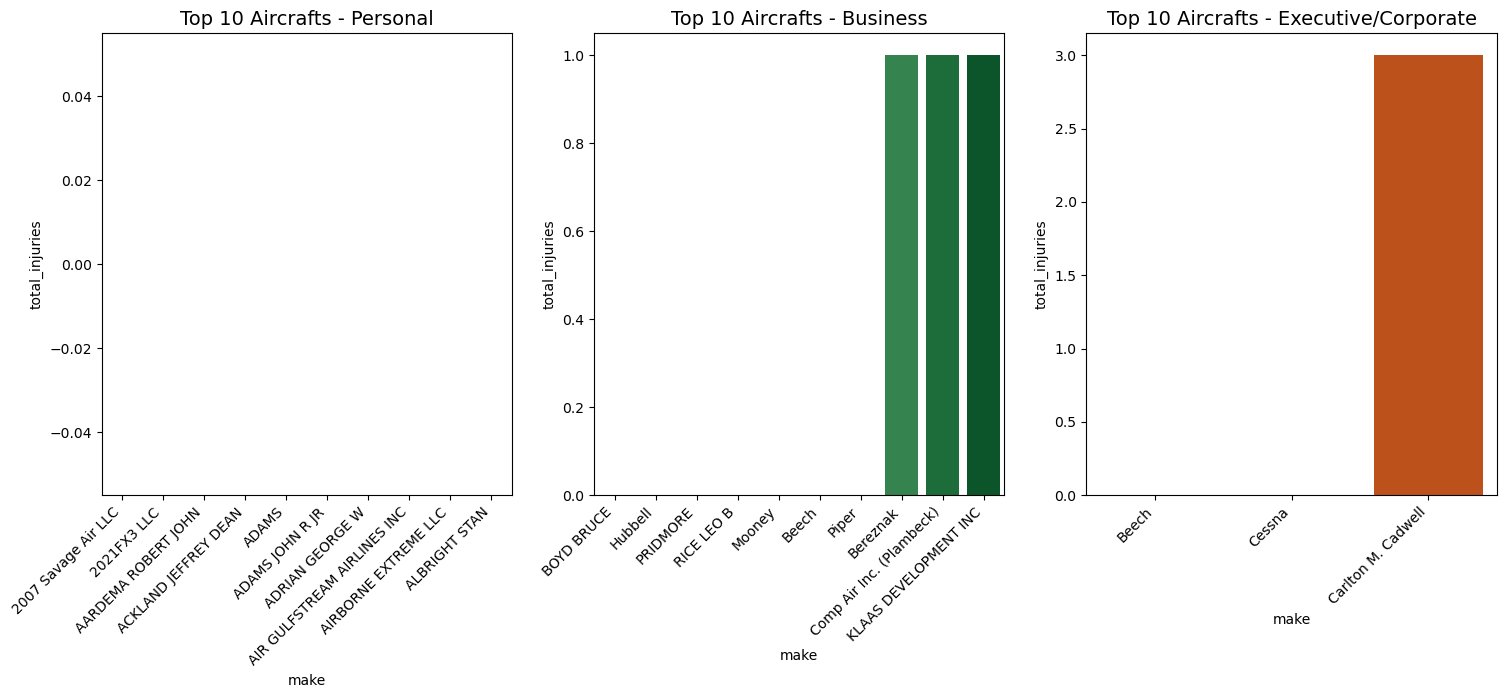

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Personal
sns.barplot(x='make', y='total_injuries', data=personal_data_sorted, ax=axes[0], palette='Blues')
axes[0].set_title("Top 10 Aircrafts - Personal", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Business
sns.barplot(x='make', y='total_injuries', data=business_data_sorted, ax=axes[1], palette='Greens')
axes[1].set_title("Top 10 Aircrafts - Business", fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Executive/Corporate
sns.barplot(x='make', y='total_injuries', data=executive_data_sorted, ax=axes[2], palette='Oranges')
axes[2].set_title("Top 10 Aircrafts - Executive/Corporate", fontsize=14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.show()

## Conclusions

Based on the analysis done, Horizon Enterprise should focus mostly on airplane as they are the most common in the dataset, based on the freuquency of their occurence in the data.
For 
1. Executive/Corporate  flight purposes, the Beech 18 and Cessna, had the lowest rate of accidents, and are the most common
1. Business flight purposes the listed makes are the most common and have the least number of accident occurences and total number of injuries (BOYD BRUCE, Hubbell, PRIDMORE, RICE LEO B, Mooney, Beech, Piper, Bereznak, Comp Air Inc. (Plambeck), KLAAS DEVELOPMENT INC)
1. Personal flight purpose the following had the least total injuries and are widely used in the sector (2007 Savage Air LLC, 2021FX3 LLC, 5 RIVERS LLC, 781569 INC, AARDEMA ROBERT JOHN, ABBETT GERRY, ABBEY VICTOR, ACKLAND JEFFREY DEAN, ACRO, ADAMS)


### Next Steps

More data could enable to make more informed choices especially with regards to

1. Total Cost of Purchasing and Operating the Aircraft: More data on the upfront purchase price and ongoing operational costs (like maintenance, insurance, and fuel) would enable a more informed decision on the total cost of ownership

1. Number of Passengers it Carries: Additional data on the seating capacity and passenger demand would provide insight into which aircraft best meets your operational needs, and this also affects the survival and injury rates data of the aircraft

In [69]:
aviation_data.to_csv('data/aviation_data.csv', index=False)

In [70]:
us_aviation_data.to_csv('data/us_aviation_data.csv', index=False)